<a href="https://colab.research.google.com/github/kooose38/-Python-Stan-/blob/main/%E3%83%99%E3%82%A4%E3%82%BA%E5%8D%98%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pystan 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pystan 

plt.style.use("ggplot")

In [ ]:
df = pd.read_excel("/content/real_estate1.xlsx")
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


In [ ]:
df.space.value_counts().to_frame()

,space
70,16
90,4
50,3


(array([2., 3., 1., 5., 3., 4., 2., 1., 1., 1.]),
 array([3050., 3456., 3862., 4268., 4674., 5080., 5486., 5892., 6298.,
        6704., 7110.]),
 <a list of 10 Patch objects>)

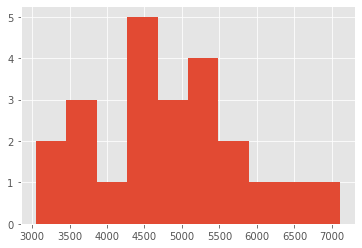

In [ ]:
plt.hist(df["value"])

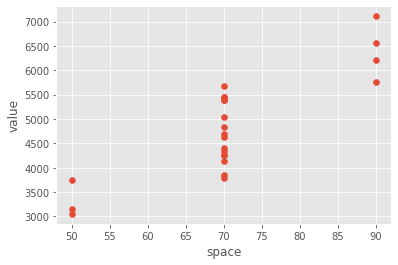

In [ ]:
plt.scatter(df["space"], df["value"])
plt.xlabel("space")
plt.ylabel("value")
plt.show()

In [ ]:
stan_model = """
data {
    int N;
    real X[N];
    real Y[N];
}

parameters {
    real a;
    real b;
    real<lower=0> sigma;
}

model {
    for(i in 1:N) {
        Y[i] ~ normal(a * X[i] + b, sigma);
    }
}
"""

In [ ]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_145826f22364312d3aa59ac1af865665 NOW.


In [ ]:
stan_data = {"N": df.shape[0], "X": df["space"], "Y": df["value"]}

In [ ]:
fit = sm.sampling(data=stan_data, iter=2000, warmup=500, chains=3, seed=123)

In [ ]:
fit

Inference for Stan model: anon_model_145826f22364312d3aa59ac1af865665.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      77.96    0.32  11.81  55.66  70.03  77.63  85.38 102.24   1380    1.0
b     -691.7   23.07  847.9  -2453  -1219 -673.4 -119.0 883.25   1351    1.0
sigma 613.35    2.54 102.98  448.8 539.07 600.34 670.48 865.31   1640    1.0
lp__  -152.0    0.03   1.35 -155.4 -152.6 -151.6 -151.0 -150.5   1487    1.0

Samples were drawn using NUTS at Fri Dec 31 04:59:40 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

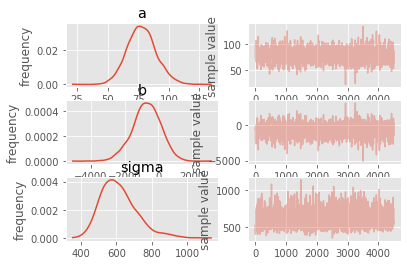

In [ ]:
fig = fit.plot()

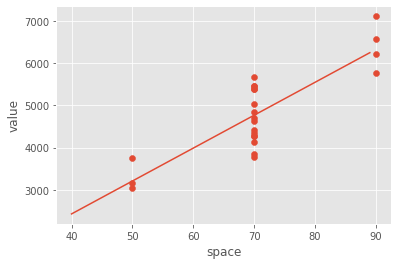

In [ ]:
a = 77.96 
b = -691.7
x = np.arange(40, 90, 1)
y = a * x + b 

plt.plot(x, y)
plt.scatter(df["space"], df["value"])
plt.xlabel("space")
plt.ylabel("value")
plt.show()